In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import random
import matplotlib.pyplot as plt

In [11]:
# Veri setini yükleme
file_path = r'C:\Users\realb\Desktop\2. el araç fiyatı/car_prediction_data.csv'
data = pd.read_csv(file_path)

# İlk birkaç satıra bakma
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
# Kategorik verileri sayısal verilere dönüştürme
data_dummies = pd.get_dummies(data, drop_first=True)

In [15]:
# Bağımlı ve bağımsız değişkenleri ayırma
X = data_dummies.drop(['Selling_Price'], axis=1)
y = data_dummies['Selling_Price']

In [16]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Modeli oluşturma ve eğitme
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
# Test seti ile tahmin yapma
y_pred = model.predict(X_test)

In [19]:
# Model performansını değerlendirme
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.5871639344262295


In [20]:
# Rastgele bir veri seçme
random_index = random.randint(0, X_test.shape[0] - 1)
random_sample = X_test.iloc[random_index]

In [21]:
# Tahmin yapma
predicted_price = model.predict([random_sample])[0]
real_price = y_test.iloc[random_index]

C:\Users\realb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [22]:
# Sonuçları gösterme
print(f"Selected Sample Index: {random_index}")
print(f"Predicted Price: {predicted_price}")
print(f"Real Price: {real_price}")

Selected Sample Index: 46
Predicted Price: 8.203999999999997
Real Price: 6.25


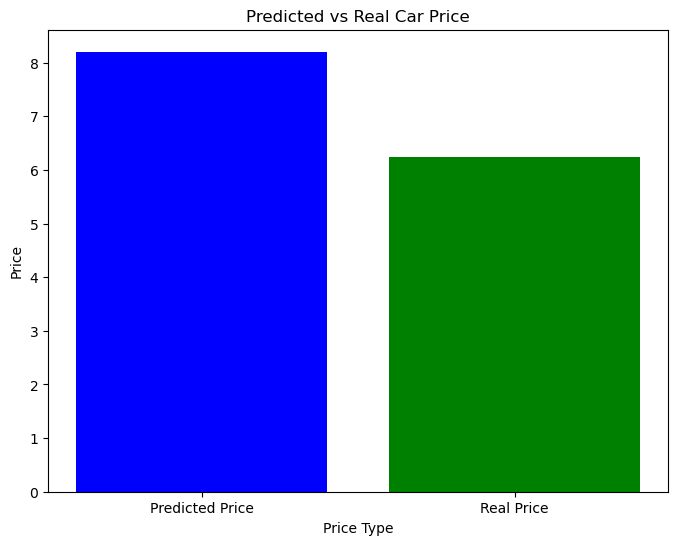

In [23]:
# Sonuçları görselleştirme
labels = ['Predicted Price', 'Real Price']
prices = [predicted_price, real_price]

plt.figure(figsize=(8, 6))
plt.bar(labels, prices, color=['blue', 'green'])
plt.title('Predicted vs Real Car Price')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()